# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [29]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import binom
from scipy.stats import poisson
sns.set_theme(context='notebook', style='whitegrid')

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [3]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

total_fruits = 100
apples = 60
oranges = 40

p = apples/total_fruits
q = oranges/total_fruits
print(f"p: {p:.2f}")
print(f"q: {q:.2f}")

p: 0.60
q: 0.40


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [12]:
# What is the probability that the first 5 fruits are all apples?
p_5apple = p**5
print(round(p_5apple,3))
p_15oranges = q**15
p_5a_15o = p_5apple * p_15oranges
print(round(p_5a_15o, 3))

0.078
0.0


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [ ]:
# your solution here

n = 20 #numer of trials
p #probability of apples
q #probability of oranges
ka = 5 #prob of 5 apples
ko = 15 #prob of 15 oranges

prob = binom.pmf(ka, n, p)
print(f"Number of oranges in sample (n-k): {n - ka}\n")
print(f"The probability of the sample containing exactly 5 apples and 15 oranges is: {prob:.10f}")

Number of oranges in sample (n-k): 15

The probability of the sample containing exactly 5 apples and 15 oranges is: 0.0012944935


In [ ]:
# your solution here

In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [17]:
# your code here
n = 20 #numer of trials
p #probability of apples
# P(x <= 4) -- prob of less than 5 apples
prob_cdf = binom.cdf(4, n, p)
print(f"The probability of the sample containing less than 5 apples is: {prob:.3f}")

The probability of the sample containing less than 5 apples is: 0.001


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

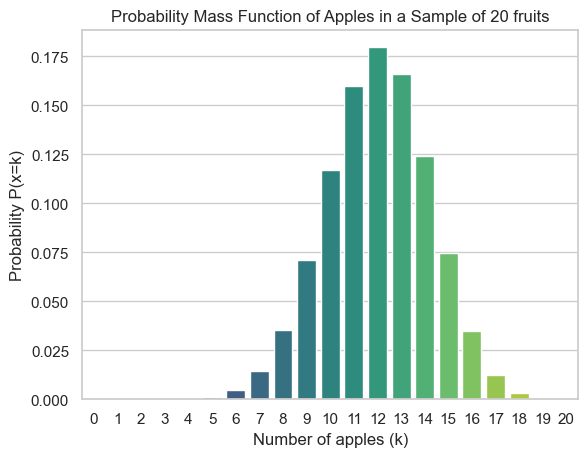

In [27]:
# your code here
#PMF for all possible number of apples
k_allapples = np.arange(0, n + 1)
pmf_apples = binom.pmf(k_allapples, n, p)
pmf_apples
# Please label the axes and give a title to the plot 
sns.barplot(x=k_allapples, y=pmf_apples, palette='viridis', hue=k_allapples, legend=False)
plt.title('Probability Mass Function of Apples in a Sample of 20 fruits')
plt.xlabel('Number of apples (k)')
plt.ylabel('Probability P(x=k)')
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [32]:
# your code here 
lambda_rate = 2.3 #average number of goals in a match

#probability of 5 goals in a match
prob_5 = poisson.pmf(5, lambda_rate)
print(f"Probability of 5 goals scored in a match: {round(prob_5, 3)}")

Probability of 5 goals scored in a match: 0.054


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

In [ ]:
# your code here
goals_010 = np.arange(0, 10)
prob_010 = poisson.pmf(goals_010, lambda_rate)
print(f"Probability of 0 to 10 goals scored in a match: {prob_010}")

# Please label the axes and give a title to the plot 


Probability of 0 to 10 goals scored in a match: [0.10025884 0.23059534 0.26518464 0.20330823 0.11690223 0.05377503
 0.02061376 0.00677309 0.00194726 0.00049763]


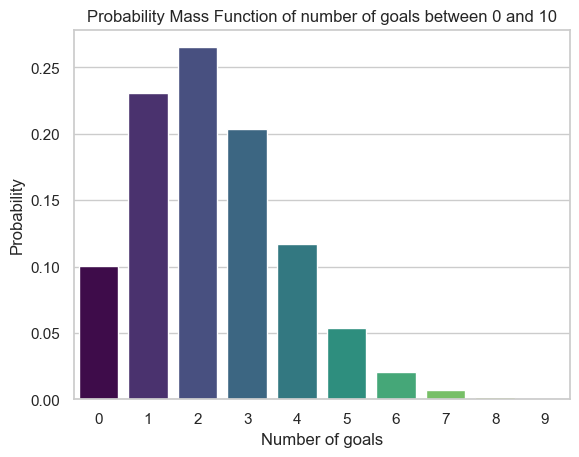

In [39]:
sns.barplot(x=goals_010, y=prob_010, palette='viridis', hue=goals_010, legend=False)
plt.title('Probability Mass Function of number of goals between 0 and 10')
plt.xlabel('Number of goals')
plt.ylabel('Probability')
plt.show()